<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1">Imports</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2">Data pre-processing</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3">Baseline</a></span><ul class="toc-item"><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-3.1">Naive Bayes</a></span></li></ul></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-4">Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Initial-trees" data-toc-modified-id="Initial-trees-4.1">Initial trees</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-4.2">Hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Random-Forests" data-toc-modified-id="Random-Forests-5">Random Forests</a></span><ul class="toc-item"><li><span><a href="#Initial-forests" data-toc-modified-id="Initial-forests-5.1">Initial forests</a></span></li><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-5.2">Hyperparameter tuning</a></span></li><li><span><a href="#Tuning-the-number-of-trees" data-toc-modified-id="Tuning-the-number-of-trees-5.3">Tuning the number of trees</a></span></li><li><span><a href="#OOB-error" data-toc-modified-id="OOB-error-5.4">OOB error</a></span></li><li><span><a href="#Overfitting?" data-toc-modified-id="Overfitting?-5.5">Overfitting?</a></span></li></ul></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-6">Model Interpretation</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-6.1">Introduction</a></span></li><li><span><a href="#Tree-variance-for-prediction-confidence" data-toc-modified-id="Tree-variance-for-prediction-confidence-6.2">Tree variance for prediction confidence</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6.3">Feature importance</a></span></li><li><span><a href="#Removing-low-importance-features" data-toc-modified-id="Removing-low-importance-features-6.4">Removing low-importance features</a></span></li><li><span><a href="#Removing-redundant-features" data-toc-modified-id="Removing-redundant-features-6.5">Removing redundant features</a></span></li><li><span><a href="#Partial-dependance" data-toc-modified-id="Partial-dependance-6.6">Partial dependance</a></span></li><li><span><a href="#Tree-interpretor" data-toc-modified-id="Tree-interpretor-6.7">Tree interpretor</a></span></li><li><span><a href="#Finding-out-of-domain-data" data-toc-modified-id="Finding-out-of-domain-data-6.8">Finding out-of-domain data</a></span></li></ul></li><li><span><a href="#Imbalanced-learn" data-toc-modified-id="Imbalanced-learn-7">Imbalanced learn</a></span><ul class="toc-item"><li><span><a href="#RandomUnderSampler" data-toc-modified-id="RandomUnderSampler-7.1">RandomUnderSampler</a></span></li><li><span><a href="#RandomOverSampler" data-toc-modified-id="RandomOverSampler-7.2">RandomOverSampler</a></span></li></ul></li></ul></div>

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [85]:
import seaborn as sn

from fastbook import *
from utils import *
from fastai.tabular.all import *
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from IPython.display import Image, display_svg, SVG
#from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV



from custom_functions import fit
from custom_functions import plot_confusion_matrix
from custom_functions import metrics
from custom_functions import plot_roc_prc



path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
Path.BASE_PATH = path
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

# Data pre-processing

In [5]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [6]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
562834,3549834,0,14919126,57.95,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,0.0,NaN,comcast.net,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,NaN,NaN,81.0,31.0,NaN,NaN,NaN,NaN,81.0,81.0,NaN,NaN,NaN,81.0,T,T,T,NaN,NaN,T,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80660,3067660,0,1731739,150.00,R,2114,396.0,150.0,mastercard,224.0,debit,315.0,87.0,NaN,NaN,yahoo.com,sbcglobal.net,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,115.041664,0.041666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,75759.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,-360.0,Found,Found,166.0,NaN,312.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Windows 10,ie 11.0 for desktop,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Trident/7.0
347704,3334704,0,8559796,47.95,W,10112,360.0,150.0,visa,166.0,debit,264.0,87.0,2.0,NaN,NaN,NaN,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,5.0,T,T,T,NaN,NaN,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196807,3183807,0,4427895,39.00,W,4806,490.0,150.0,visa,226.0,debit,315.0,87.0,NaN,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565353,3552353,0,14995132,280.00,W,16873,343.0,150.0,visa,226.0,credit,512.0,87.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,135.0,135.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,136.0,T,T,T,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_ss.shape

(59054, 95)

In [7]:
train_ss['isFraud']

562834    0
80660     0
347704    0
196807    0
565353    0
         ..
331087    0
130888    0
170061    0
262042    0
509283    0
Name: isFraud, Length: 59054, dtype: int64

To create a validation set we will take rows with transaction numbers greater than a certain value. These rows are transactions that occur later. This seems like a good idea since the test set consists of transactions that happen in the future with respect to our data set.

In [9]:
# The rows with TransactionID <= 12666124 comprise the first 80% of the data (approximately)
cut_off = math.floor(train_ss['TransactionDT'].min() + 
                    (train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12666124

In [10]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [11]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionAmt', 'TransactionDT',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'


In [12]:
len(cont),len(cat)

(45, 49)

In [13]:
assert len(cat)+len(cont)==(len(train_ss.columns)-1)

In [14]:
procs = [Categorify, FillMissing]

Categorify replaces categorical columns with numerical categorical columns. FillMissing replaces missing values with the median of the column and creates a new Boolean column that records whether data was missing.

In [15]:
to = TabularPandas(train_ss, procs, cat, cont, y_names=dep_var, splits=splits,
                   do_setup=True, reduce_memory=True)

With do_setup=True the procs are applied to the data on initialization.

In [16]:
to.xs.shape, to.train.xs.shape, to.valid.xs.shape, to.valid.y.sum(), to.valid.y.mean()

((59054, 122), (48491, 122), (10563, 122), 359, 0.03398655684937991)

There are 359 cases of fraud in the validation set.

In [17]:
assert len(to.train.xs) + len(to.valid.xs) == len(to.xs)
assert to.train.xs['TransactionDT'].max() < to.valid.xs['TransactionDT'].min()

In [18]:
to.items.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
80660,3067660,0,1731739,150.000000,3,362,295,30,3,71,3,71,27,9.0,44.0,54,43,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,98.0,8.0,21.0,9.0,0.0,0.0,115.041664,0.041666,12.0,34.0,0.0,0.0,0.0,47.0,0,0,0,0,0,0,0,0,0,-5.0,75759.0,0.0,0.0,0.0,0.0,15.0,-34.0,0.0,0.0,100.000000,2,28,5,1,1,31,0,123,79,0,0,0,0,0,0,0,1,1,41,75,2,62,3,2,1,2,2,1,666,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,2,2,1,1,1,1,1,1,2,2,1,1,1
347704,3334704,0,8559796,47.950001,5,2965,259,30,4,41,3,54,27,2.0,44.0,0,0,3.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,3.0,0.0,98.0,8.0,21.0,9.0,0.0,0.0,41.000000,0.666666,5.0,5.0,0.0,0.0,0.0,5.0,2,2,2,0,0,1,1,2,2,-5.0,126067.0,0.0,0.0,0.0,0.0,15.0,-34.0,0.0,0.0,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
196807,3183807,0,4427895,39.000000,5,1267,389,30,4,73,3,71,27,9.0,44.0,3,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,98.0,8.0,0.0,9.0,0.0,0.0,41.000000,0.666666,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,2,1,0,0,0,-5.0,126067.0,0.0,0.0,0.0,0.0,15.0,-34.0,0.0,0.0,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
452433,3439433,0,11556482,150.000000,3,3914,154,30,4,73,3,75,27,9.0,44.0,54,19,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,98.0,8.0,0.0,9.0,0.0,0.0,960.750000,0.750000,12.0,34.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,-5.0,48180.0,0.0,0.0,2.0,-100.0,15.0,-34.0,0.0,0.0,97.120003,2,28,6,2,2,31,3,137,153,0,0,0,0,0,0,0,1,1,42,45,2,16,3,2,1,2,1,1,685,2,2,1,2,2,1,2,1,2,1,1,2,2,2,2,2,1,1,1,2,2,1,1,2,2,1,1,1
433846,3420846,0,10966739,139.949997,5,3676,259,30,4,41,3,29,27,9.0,44.0,54,0,3.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,5.0,3.0,0.0,98.0,8.0,0.0,9.0,0.0,0.0,41.000000,0.666666,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,0,0,1,1,1,2,-5.0,126067.0,0.0,0.0,0.0,0.0,15.0,-34.0,0.0,0.0,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,2,1,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2


In [20]:
to['addr1'], type(train_ss['addr1'].iloc[0])

(80660      71
 347704     54
 196807     71
 452433     75
 433846     29
          ... 
 489447     94
 515755     64
 500704     71
 570628    111
 509283     56
 Name: addr1, Length: 59054, dtype: int16,
 numpy.float64)

Categorical features have been label encoded and memory reduction applied.

In [21]:
to.cat_names

(#77) ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain'...]

In [22]:
to.cont_names

(#45) ['TransactionID','TransactionAmt','TransactionDT','dist1','dist2','C1','C2','C3','C4','C5'...]

In [23]:
to.classes['card1']

(#5656) ['#na#',1001,1006,1009,1010,1012,1013,1015,1016,1018...]

card1 has 5656 levels.

In [24]:
assert (len(to.cont_names)+len(to.cat_names)+1)==to.items.shape[1]

In [23]:
(path/'to_ss.pkl').save(to)

In [25]:
to = (path/'to_ss.pkl').load()

In [26]:
xs, y             = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [27]:
xs.shape, valid_xs.shape, valid_y.sum()

((48491, 122), (10563, 122), 359)

The number of columns has increased from 95 to 122 because the FillMissing proc has created new columns to indicate where data was missing.

# Baseline 

##  Naive Bayes

The evaluation metric for this competition was roc_auc_score. Gaussian Naive Bayes is a reasonable baseline model for tabular data, and its roc_auc_score is well defined. Although roc_auc_score is the focus of the competition, I will keep track of a range of metrics to see how they change in relation to each other. It will also be interesting to see how different metrics are affected by changes to the model and from model to model.

In [56]:
m = GaussianNB()

In [57]:
_, _, baseline_prob, baseline_pred = fit(m, xs, y, valid_xs, valid_y)

Train_AROC: 0.7072535582073939
Valid_AROC: 0.7095931029286674


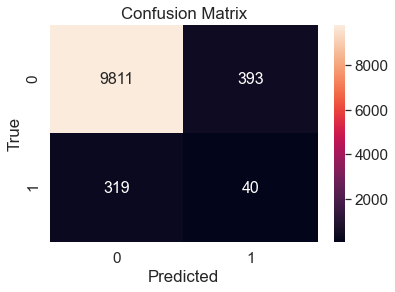

In [37]:
fig = plot_confusion_matrix(valid_y, baseline_pred)
fig.savefig(path.BASE_PATH/'../figures/GaussianNB_cm.jpg', dpi=1000, bbox_inches='tight')

In [49]:
metrics(valid_y, baseline_pred, baseline_prob, acc=True);

AROC: 0.7095931029286674
APRC: 0.07770242254311606
Percision: 0.09237875288683603
Recall: 0.11142061281337047
ACC: 0.9325949067499764
F1: 0.10101010101010101
F2: 0.10700909577314073
F5: 0.11054421768707483
F10: 0.1111936806759695


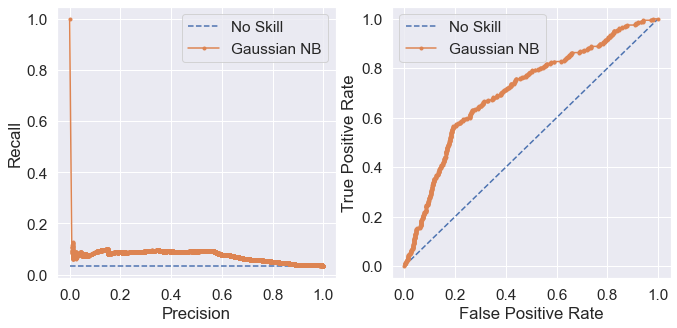

In [53]:
fig = plot_roc_prc(valid_y, baseline_prob, label='Gaussian NB')
fig.savefig(path.BASE_PATH/'../figures/GaussianNB_aucs.jpg', dpi=1000, bbox_inches='tight')

# Decision Trees

## Initial trees

In [60]:
m = DecisionTreeClassifier()
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 1.0
Valid_AROC: 0.6467034883911383


With default values, the tree appears to overfit. It does worse than the baseline Naive Bayes model. So let's try to prevent overfitting by tuning down the max_leaf_nodes parameter.

In [61]:
m = DecisionTreeClassifier(max_leaf_nodes=5000, max_features='sqrt')
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 1.0
Valid_AROC: 0.6354709333496396


In [62]:
m = DecisionTreeClassifier(max_leaf_nodes=500, max_features='sqrt')
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.855803901063987
Valid_AROC: 0.6912301036569853


In [84]:
m = DecisionTreeClassifier(max_leaf_nodes=200, max_features='sqrt')
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.83626865283621
Valid_AROC: 0.7629230003199358


In [64]:
m = DecisionTreeClassifier(max_leaf_nodes=100, max_features='sqrt')
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.8294983593089532
Valid_AROC: 0.7820252367032865


In [65]:
m = DecisionTreeClassifier(max_leaf_nodes=50, max_features='sqrt')
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.7933950598016964
Valid_AROC: 0.7825467701234645


In [78]:
m = DecisionTreeClassifier(max_leaf_nodes=100, max_features='sqrt')
_, _, valid_prob, valid_pred = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.8199393108197994
Valid_AROC: 0.7789028607493484


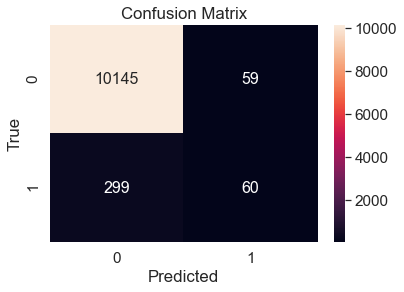

In [79]:
fig = plot_confusion_matrix(valid_y, valid_pred)
fig.savefig(path.BASE_PATH/'../figures/Initial_DT_cm.jpg', dpi=1000, bbox_inches='tight')

In [80]:
metrics(valid_y, valid_pred, valid_prob, acc=True);

AROC: 0.7789028607493484
APRC: 0.25265483103207076
Percision: 0.5042016806722689
Recall: 0.1671309192200557
ACC: 0.9661081132254095
F1: 0.2510460251046025
F2: 0.19292604501607716
F5: 0.17154167583021773
F10: 0.16824453760515284


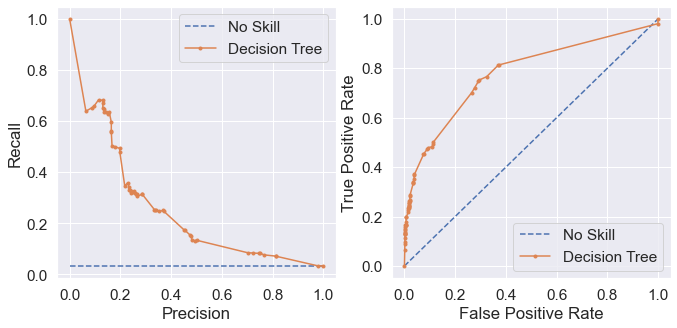

In [81]:
fig = plot_roc_prc(valid_y, valid_prob, label='Decision Tree')
fig.savefig(path.BASE_PATH/'../figures/Initial_DT_aucs.jpg', dpi=1000, bbox_inches='tight')

With max_leaf_nodes values less than or equal to 200, the decision tree beats the baseline model. However, there was a lot of variance in the prediction of decision trees trained with a given parameter set.

## Hyperparameter tuning

Hyperparameters:

[source](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680)
1. criterion='entropy' or criterion='gini': entropy seems to work a little better!
2. splitter='best' or splitter='random': use best unless there is an overfitting problem, than consider 'random' 
   (still random splitting doesn't seem to me like the first thing to combat overfitting.
3. max_depth='None': I will instead control the depth of the tree using max_leaf_nodes, min_samples_leaf and min_samples_split.
4. min_samples_split: ideal value for CART algorithim implemented in scikit is in [1,40].
5. min_samples_leaf: ideal value for CART algorithim implemented in scikit is in [1,20].
6. min_weight_fraction_leaf: after setting sample_weights this will help deal with the class imbalance
7. max_features='sqrt', 'log2': just try them.
8. min_impurity_decrease: leave it at 0.
9. class_weight='balanced': sometimes leads to better results with imbalanced data.

In [77]:
parameters = {'min_samples_split': [2, 5, 10, 20, 30, 40], 
              'min_samples_leaf':[1, 5, 10, 20], 
              'max_features':('sqrt', 'log2'), 
              'max_leaf_nodes':[5, 10, 20, 50, 100, 200],
              'class_weight':('balanced', None)}

In [78]:
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), parameters, 
                   scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

In [117]:
%%time
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

CPU times: user 25.6 s, sys: 16.1 s, total: 41.7 s
Wall time: 3min 16s


(DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                        max_leaf_nodes=100, min_samples_leaf=10),
 0.8255639718844769,
 {'class_weight': None,
  'max_features': 'sqrt',
  'max_leaf_nodes': 100,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

The grid search was run several times. As a result of the randomness involved in creating a decision tree a range of results obtained. The only consistent result was max_features='sqrt'. Let's see what we get with the parameters above. 

In [116]:
m = DecisionTreeClassifier(class_weight=None, criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=100,
                        min_samples_leaf=10, min_samples_split=2)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.8601645269925563
Valid_AROC: 0.7901511122952493


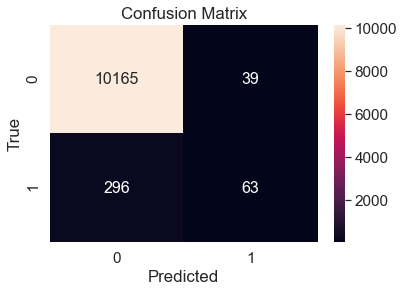

In [117]:
plot_confusion_matrix(valid_y, pred_valid);

In [118]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.7901511122952493
APRC: 0.2930849619357294
Percision: 0.6176470588235294
Recall: 0.17548746518105848
ACC: 0.9682855249455647
F1: 0.27331887201735355
F2: 0.20481144343302987
F5: 0.1804560978296794
F10: 0.17674018110104994


Because of the approximately 30 to 1 class imbalance, I expect that class_weight='balanced' will improve the recall score. 

In [119]:
m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=100,
                        min_samples_leaf=10, min_samples_split=2)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.8765342731821193
Valid_AROC: 0.8036274485181953


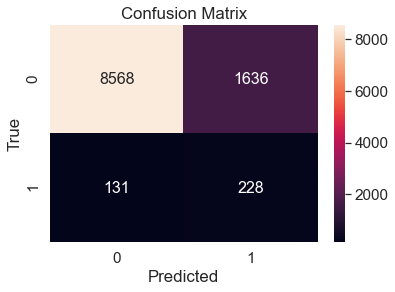

In [120]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/Final_DT_cm.jpg', dpi=1000, bbox_inches='tight')

In [121]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8036274485181953
APRC: 0.22263188588338648
Percision: 0.1223175965665236
Recall: 0.6350974930362117
ACC: 0.8327179778472025
F1: 0.20512820512820512
F2: 0.34545454545454546
F5: 0.5469139219485192
F10: 0.6097870988242771


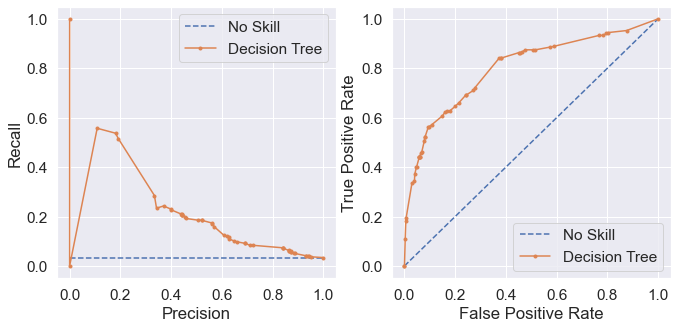

In [99]:
fig = plot_roc_prc(valid_y, prob_valid, label='Decision Tree')
fig.savefig(path.BASE_PATH/'../figures/Final_DT_aucs.jpg', dpi=1000, bbox_inches='tight')

Setting class_weight='balanced' improved the recall score from 0.17 to 0.64, while precision decreased from 0.50 to 0.12. Overall this helps the roc_auc_score so moving forward I will use class_weight='balanced'.

# Random Forests

In [122]:
def rf(**kwargs):
    return RandomForestClassifier(n_jobs=-1, max_samples=2/3, 
                                  oob_score=True, class_weight='balanced', 
                                  max_features='sqrt', **kwargs)

## Initial forests

First, we try a random forest that uses the decision tree hyperparameters.

In [102]:
%%time
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=100, min_samples_split=10, min_samples_leaf=2)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9327407022878932
Valid_AROC: 0.8614219777267966
CPU times: user 2min 7s, sys: 2.35 s, total: 2min 9s
Wall time: 26.7 s


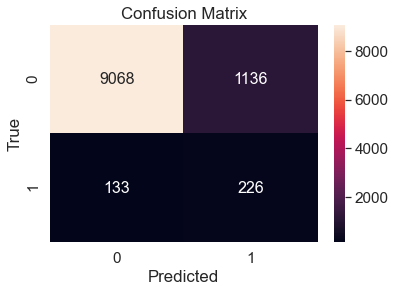

In [103]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/Initial_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [104]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8614219777267966
APRC: 0.39712411196818304
Percision: 0.16593245227606462
Recall: 0.6295264623955432
ACC: 0.8798636750923033
F1: 0.26263800116211505
F2: 0.4038598999285204
F5: 0.5684434555480313
F10: 0.6125811819011326


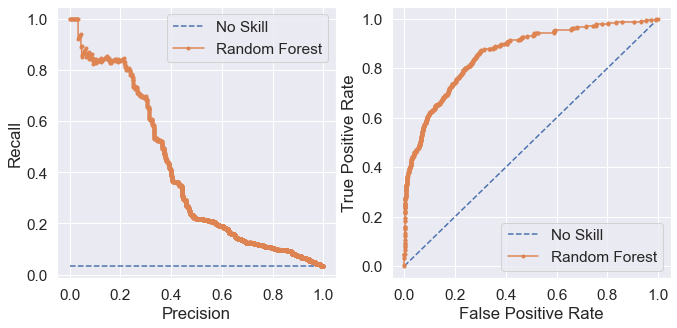

In [105]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/Initial_RF_aucs.jpg', dpi=1000, bbox_inches='tight')

This is already looking alot better than both the baseline model and the decision tree model. Recall relative to the decision tree has only dropped by about 7 percent where as the precision has improved by nearly 70 percent. The roc_auc_score has improved aswell. Let's try tuning the hyperparameters. 

## Hyperparameter tuning

Along with the hyperparameters of their decision trees, Random Forests have some additional hyperparameters:

1. max_samples: max_samples is set to 2/3 of the total samples based on recommendations from the literature on the subject. By default RandomForestClassifier for each tree by random sampling N data points with replacement where N is the size of the original dataset. For large datasets, this means that approximately 2/3 of data points will be included in each bootstrapped sample. Setting max_samples to 2/3 guarantees that none of the bootstrapped samples will contain more than 2/3 of the original data points. 
2. n_estimators: we will tune this separately from other hyperparameters by plotting it against he roc_auc_score and choosing a value that maximizes the roc_auc_score without using more computational power than necessary.

Parameters were searched iteratively.

In [156]:
parameters = {'min_samples_split': [2, 5, 10, 20, 30, 40], 
              'min_samples_leaf':[1, 5, 10, 20],  
              'max_leaf_nodes':[5, 10, 20, 50, 100, 200]}

In [164]:
parameters2 = {'min_samples_split': [30, 40, 50],   
              'max_leaf_nodes':[200, 500, 1000, 2000]}

In [167]:
parameters3 = {'min_samples_split': [30],   
              'max_leaf_nodes':[500, 750, 1000, 1250, 1500]}

In [157]:
clf = GridSearchCV(RandomForestClassifier(n_estimators = 50, criterion='entropy', class_weight='balanced',
                                          max_features='sqrt', max_samples=2/3), 
                   parameters, scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

In [158]:
%%time
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

CPU times: user 9.46 s, sys: 4.05 s, total: 13.5 s
Wall time: 9min 2s


(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=200,
                        max_samples=0.6666666666666666, min_samples_leaf=5,
                        min_samples_split=40, n_estimators=50),
 0.8865563131398068,
 {'max_leaf_nodes': 200, 'min_samples_leaf': 5, 'min_samples_split': 40})

In [106]:
%%time
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=200, min_samples_split=40, min_samples_leaf=5)
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9647932715721843
Valid_AROC: 0.8681673798794289
CPU times: user 2min 15s, sys: 1.83 s, total: 2min 17s
Wall time: 26.5 s


(array([0.04927268, 0.09597374, 0.24516469, ..., 0.07322161, 0.03566465, 0.07279035]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int8),
 array([0.07555945, 0.15865963, 0.13387783, ..., 0.16350062, 0.24841791, 0.23838676]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int8))

In [165]:
%%time
clf = GridSearchCV(RandomForestClassifier(n_estimators = 50, criterion='entropy', class_weight='balanced',
                                          max_features='sqrt', max_samples=2/3), 
                   parameters2, scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

CPU times: user 3.83 s, sys: 405 ms, total: 4.23 s
Wall time: 1min 2s


(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=1000,
                        max_samples=0.6666666666666666, min_samples_split=30,
                        n_estimators=50),
 0.888284538813369,
 {'max_leaf_nodes': 1000, 'min_samples_split': 30})

In [107]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=1000, min_samples_split=30, min_samples_leaf=5)
fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9937502997066571
Valid_AROC: 0.8762913445925953


In [168]:
%%time
clf = GridSearchCV(RandomForestClassifier(n_estimators = 50, criterion='entropy', class_weight='balanced',
                                          max_features='sqrt', max_samples=2/3), 
                   parameters3, scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

CPU times: user 3.17 s, sys: 150 ms, total: 3.32 s
Wall time: 27 s


(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=750,
                        max_samples=0.6666666666666666, min_samples_split=30,
                        n_estimators=50),
 0.8900278725340923,
 {'max_leaf_nodes': 750, 'min_samples_split': 30})

In [123]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9938594131384463
Valid_AROC: 0.8766017259057292


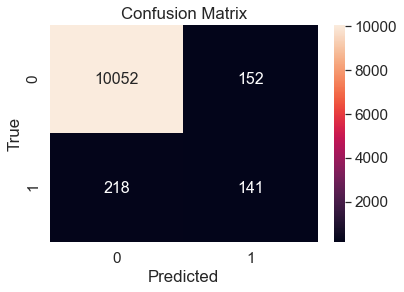

In [124]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/Final_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [125]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8766017259057292
APRC: 0.41915437296452945
Percision: 0.4812286689419795
Recall: 0.39275766016713093
ACC: 0.9649720723279371
F1: 0.4325153374233129
F2: 0.4077501445922499
F5: 0.3955545964609409
F10: 0.39347387616389906


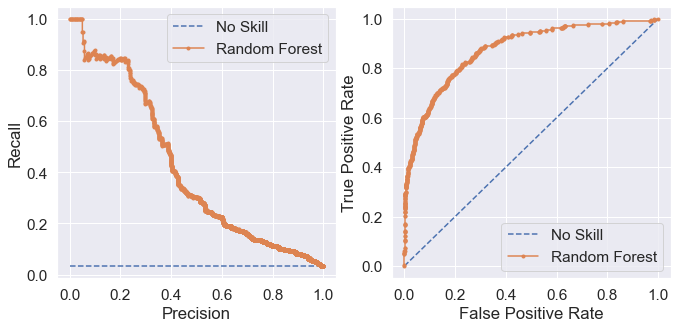

In [126]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/Final_RF_aucs.jpg', dpi=1000, bbox_inches='tight')

Hyperparameter tuning of the Random Forest has led to a modest increase in the roc_auc_score and a large increase in the precision score, at the expense of the recall score. These are the parameters that we will move forward with for the rest of this notebook.

## Tuning the number of trees

In [127]:
# Avg the prediction of the first n trees in the forest (x-axis).
# Compute the roc_auc_score (y-axis)
def rf_size_vs_score(model, n_estimators, xs=valid_xs, y=valid_y):
    preds = np.stack([t.predict_proba(xs) for t in model.estimators_])
    plt.plot([roc_auc_score(y, preds[:i+1,:,1:2].mean(0)) for i in range(n_estimators)])
    plt.xlabel('Number of Estimators')
    plt.ylabel('roc_auc_score')

We can determine the optimal number of trees that maximizes the roc_auc_score without using extraneous computational power by examining the plot below. This process is a lot more efficient than tuning the number of trees as a hyperparameter.

CPU times: user 13.7 s, sys: 709 ms, total: 14.4 s
Wall time: 14.4 s


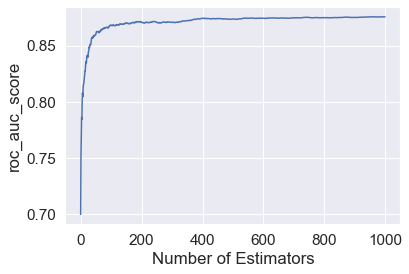

In [176]:
%%time
rf_size_vs_score(m, 1000)

We should be able to get away with using between 125 and 600 estimators.

In [177]:
%%time
m = rf(n_estimators=50, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9924286308325588
Valid_AROC: 0.863701246657327
CPU times: user 6.86 s, sys: 204 ms, total: 7.06 s
Wall time: 1.56 s


In [178]:
%%time
m = rf(n_estimators=100, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9933291784440463
Valid_AROC: 0.8671382351560205
CPU times: user 14.6 s, sys: 320 ms, total: 15 s
Wall time: 3.04 s


In [179]:
%%time
m = rf(n_estimators=200, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9935116165192077
Valid_AROC: 0.8745027620388094
CPU times: user 32.1 s, sys: 555 ms, total: 32.7 s
Wall time: 6.27 s


In [180]:
%%time
m = rf(n_estimators=400, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9935707299496932
Valid_AROC: 0.8720052434514184
CPU times: user 1min 15s, sys: 1.22 s, total: 1min 16s
Wall time: 14.4 s


In [181]:
%%time
m = rf(n_estimators=600, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y , valid_xs, valid_y);

Train_AROC: 0.9937415643739651
Valid_AROC: 0.8766612361311145
CPU times: user 2min 7s, sys: 1.93 s, total: 2min 8s
Wall time: 23.3 s


In [182]:
%%time
m = rf(n_estimators=800, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9938623075322636
Valid_AROC: 0.8785183373388992
CPU times: user 3min 9s, sys: 2.55 s, total: 3min 11s
Wall time: 34.5 s


In [183]:
%%time
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9938502345202149
Valid_AROC: 0.8755436450176838
CPU times: user 4min 7s, sys: 3.48 s, total: 4min 10s
Wall time: 44 s


200 estimators seems optimal.

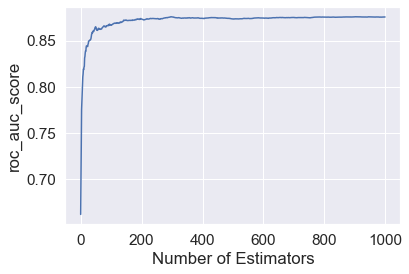

In [184]:
rf_size_vs_score(m, 1000)

In [128]:
%%time
m = rf(n_estimators=200, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y , valid_xs, valid_y);

Train_AROC: 0.9935172749287425
Valid_AROC: 0.871119960603139
CPU times: user 29.9 s, sys: 555 ms, total: 30.4 s
Wall time: 6.13 s


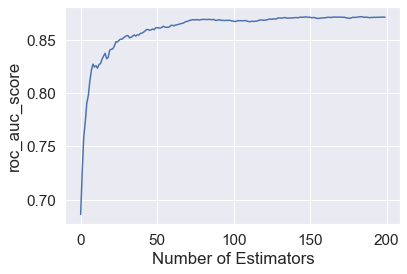

In [129]:
rf_size_vs_score(m, 200)

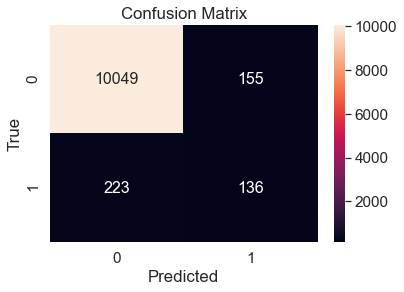

In [130]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/200Est_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [131]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.871119960603139
APRC: 0.41222251059263626
Percision: 0.46735395189003437
Recall: 0.3788300835654596
ACC: 0.9642147117296223
F1: 0.4184615384615385
F2: 0.3937463810075275
F5: 0.38161018778329375
F10: 0.3795418750518085


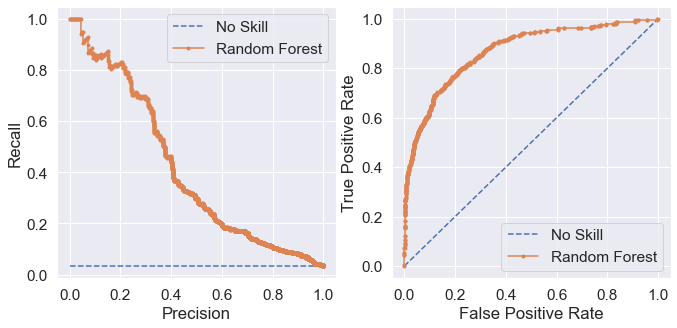

In [132]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/200Est_RF_aucs.jpg', dpi=1000, bbox_inches='tight')

## OOB error

We can compare OOB error with validation error to get an idea about whether the validation set is somehow different from the training data.

In [133]:
m.oob_decision_function_.shape

(48491, 2)

In [134]:
oob_preds = m.oob_decision_function_[:,1:2]

In [135]:
roc_auc_score(y, oob_preds)

0.8975580677329352

The fact that the OOB score is lower the validation score is an indication that the validation data is in some way different than the training data. This could be because the validation set represents the most recent data.

## Overfitting?

In [205]:
# For a set of random forests with increasing max_leaf_node_values (x-axis).
# Compute the roc_auc_score on both the training and the validation data (y-axis)
def rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y):
    plt.plot([f.max_leaf_nodes for f in forests],[roc_auc_score(y,       f.predict_proba(xs)[:,1])       for f in forests])
    plt.plot([f.max_leaf_nodes for f in forests],[roc_auc_score(valid_y, f.predict_proba(valid_xs)[:,1]) for f in forests])
    plt.xlabel('max_leaf_nodes')
    plt.ylabel('roc_auc_score')
    plt.legend(['train', 'valid'])

One of the challenges faced when building decision tree models is their tendency to overfit. Deep trees can memorize the data set. One way to control the depth of a tree is to decrease the maximum number of leaf nodes that the tree is allowed to have. We used this parameter when optimizing our decision tree. Random forests mitigate the problem of overfitting through bagging. Random forests are typically effective with deep trees, but I would like to see for myself if increasing the value of max_leaf_nodes leads to overfitting in my Random Forest model.  

In [199]:
max_leaf_node_values = np.arange(2, 20000, step=100)
max_leaf_node_values.shape

(200,)

In [204]:
%%time
forests = [] 
for max_leaf_nodes in max_leaf_node_values:
    f =  rf(n_estimators=50, criterion='entropy',
            max_leaf_nodes=max_leaf_nodes, min_samples_split=30, min_samples_leaf=5).fit(xs, y)
    forests.append(f)

CPU times: user 33min 27s, sys: 47.7 s, total: 34min 15s
Wall time: 7min 29s


CPU times: user 3min 10s, sys: 12.9 s, total: 3min 23s
Wall time: 49.8 s


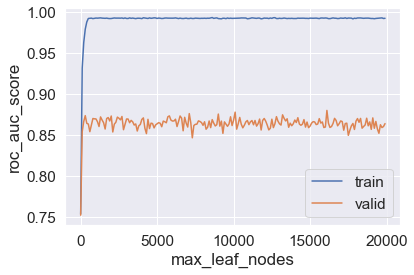

In [206]:
%%time
rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y)

Increasing the value of max_leaf_nodes doesn't seem to lead to overfitting with the RandomForestClassifier. Let's take a closer look at the early part of the plot.

In [207]:
max_leaf_node_values = np.arange(2, 2000, step=10)
max_leaf_node_values.shape

(200,)

In [208]:
%%time
forests = [] 
for max_leaf_nodes in max_leaf_node_values:
    f =  rf(n_estimators=50, criterion='entropy',
            max_leaf_nodes=max_leaf_nodes, min_samples_split=30, min_samples_leaf=5).fit(xs, y)
    forests.append(f)

CPU times: user 29min 27s, sys: 36.2 s, total: 30min 3s
Wall time: 6min 6s


CPU times: user 2min 42s, sys: 11 s, total: 2min 53s
Wall time: 43.1 s


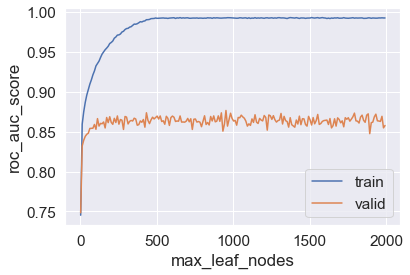

In [209]:
%%time
rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y)

In [210]:
max_leaf_node_values = np.arange(2, 500, step=10)
max_leaf_node_values.shape

(50,)

In [211]:
%%time
forests = [] 
for max_leaf_nodes in max_leaf_node_values:
    f =  rf(n_estimators=50, criterion='entropy',
            max_leaf_nodes=max_leaf_nodes, min_samples_split=30, min_samples_leaf=5).fit(xs, y)
    forests.append(f)

CPU times: user 6min 27s, sys: 6.63 s, total: 6min 33s
Wall time: 1min 20s


CPU times: user 33 s, sys: 2.4 s, total: 35.4 s
Wall time: 9.47 s


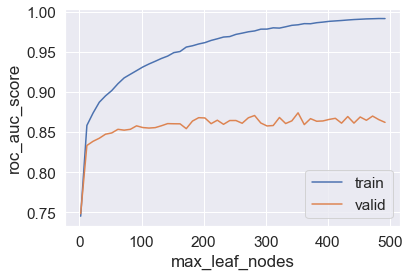

In [212]:
%%time
rf_max_leaf_nodes_vs_score(forests, xs, y, valid_xs, valid_y)

In [137]:
%%time
m = rf(n_estimators=200, criterion='entropy',
       max_leaf_nodes=200, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y , valid_xs, valid_y);

Train_AROC: 0.9638241711557802
Valid_AROC: 0.8662928077797882
CPU times: user 26.1 s, sys: 555 ms, total: 26.7 s
Wall time: 5.64 s


We can see that both the training score and the validation score continue to improve as max_leaf_nodes increases. Both scores saturate. The validation score saturates more quickly than the training score. The value of 200 for max_leaf_nodes maximizes the validation score without saturating the training score. This model might generalize a little better than a model like the one below which has a max_leaf_nodes value in the region where both scores are saturated. 

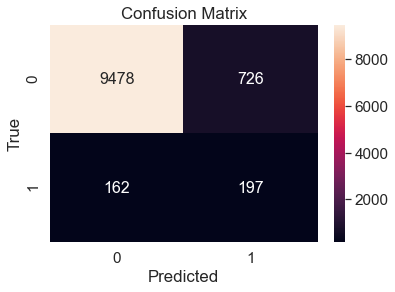

In [138]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/200Est_200MLN_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [139]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8662928077797882
APRC: 0.39738080457062974
Percision: 0.2134344528710726
Recall: 0.5487465181058496
ACC: 0.9159329735870492
F1: 0.3073322932917317
F2: 0.4175498092412039
F5: 0.517478278440089
F10: 0.5403416343046464


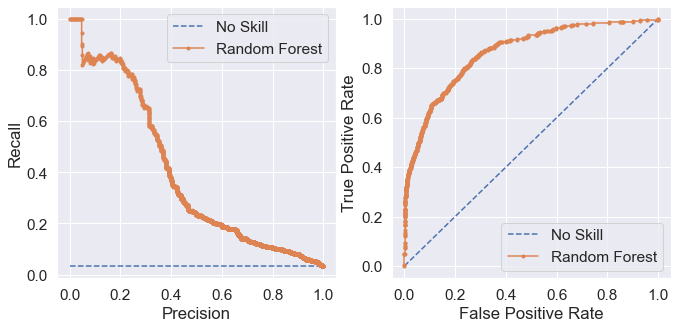

In [140]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/200Est_200MLN_RF_aucs.jpg', dpi=1000, bbox_inches='tight')

This model has a modestly decreased auc_roc_score, but a better balance of precision and recall than the model that uses max_leaf_nodes=750. We will continue to move forward with the max_leaf_nodes=750 model because the plots do not indicate that roc_auc_score decreases after a certain value of max_leaf_nodes (overfitting). 

# Model Interpretation

## Introduction

One of the advantages to using a random forest model for tabular data rather than a neural net are the tools and ideas that are available when it comes to interpretation of the model. We will look at some of these tools in this section and see how they can be used to clean the data. 

Questions:

1. How confident are we in our predictions using a particular row? 
2. What are the most important factors when predicting a particular row and how did the influence it?
3. Overall which columns are strongest predictors, which can we trow away?
4. Which columns are redundant, so both are not needed?
5. How do predictions vary as we vary these colummns?

In [104]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y , valid_xs, valid_y);

Train_AROC: 0.9936962058330171
Valid_AROC: 0.8759206341060198


## Tree variance for prediction confidence

The first question (How confident are we in our predictions using a particular row?) can be answered by looking at the variance in the predictions across the trees in the random forest. 

In [226]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds.shape, preds[:,:,1:2].std(0).transpose(), preds[:,:,1:2].std(0).transpose().mean()

((1000, 10563, 2),
 array([[0.16294804, 0.22297203, 0.19978912, ..., 0.27122571, 0.29793791, 0.29933611]]),
 0.26527801898567965)

In [227]:
m = rf(n_estimators=200, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y , valid_xs, valid_y);

Train_AROC: 0.9936499737587998
Valid_AROC: 0.8737471459660257


In [228]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds.shape, preds[:,:,1:2].std(0).transpose(), preds[:,:,1:2].std(0).transpose().mean()

((200, 10563, 2),
 array([[0.15945771, 0.18272465, 0.15028304, ..., 0.21616031, 0.26379756, 0.30372079]]),
 0.26510715660774814)

Decreasing the number of estimators from 1000 to 200 doesn't harm the confidence of the predictions obtained from the model. 

The larger the standard deviation across the trees for a particular row of data, the less confident we can be in its prediction. The trees don't agree. In cases where confident predictions are desired, these rows can be put through a different classifier to obtain more confidant predictions.

## Feature importance

The third question (overall which columns are strongest predictors, which can we trow away?) is about feature importance.

In [93]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs, y, valid_xs, valid_y);

Train_AROC: 0.9938005735019705
Valid_AROC: 0.8766120992477688


In [94]:
def rf_feature_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [95]:
fi = rf_feature_importance(m, xs)
fi[:10]

,cols,imp
94,C13,0.040221
98,D3,0.037632
78,TransactionAmt,0.037312
79,TransactionDT,0.036576
77,TransactionID,0.036364
95,C14,0.034172
1,card1,0.033432
97,D2,0.032550
86,C5,0.031595
7,addr1,0.028388


<AxesSubplot:ylabel='cols'>

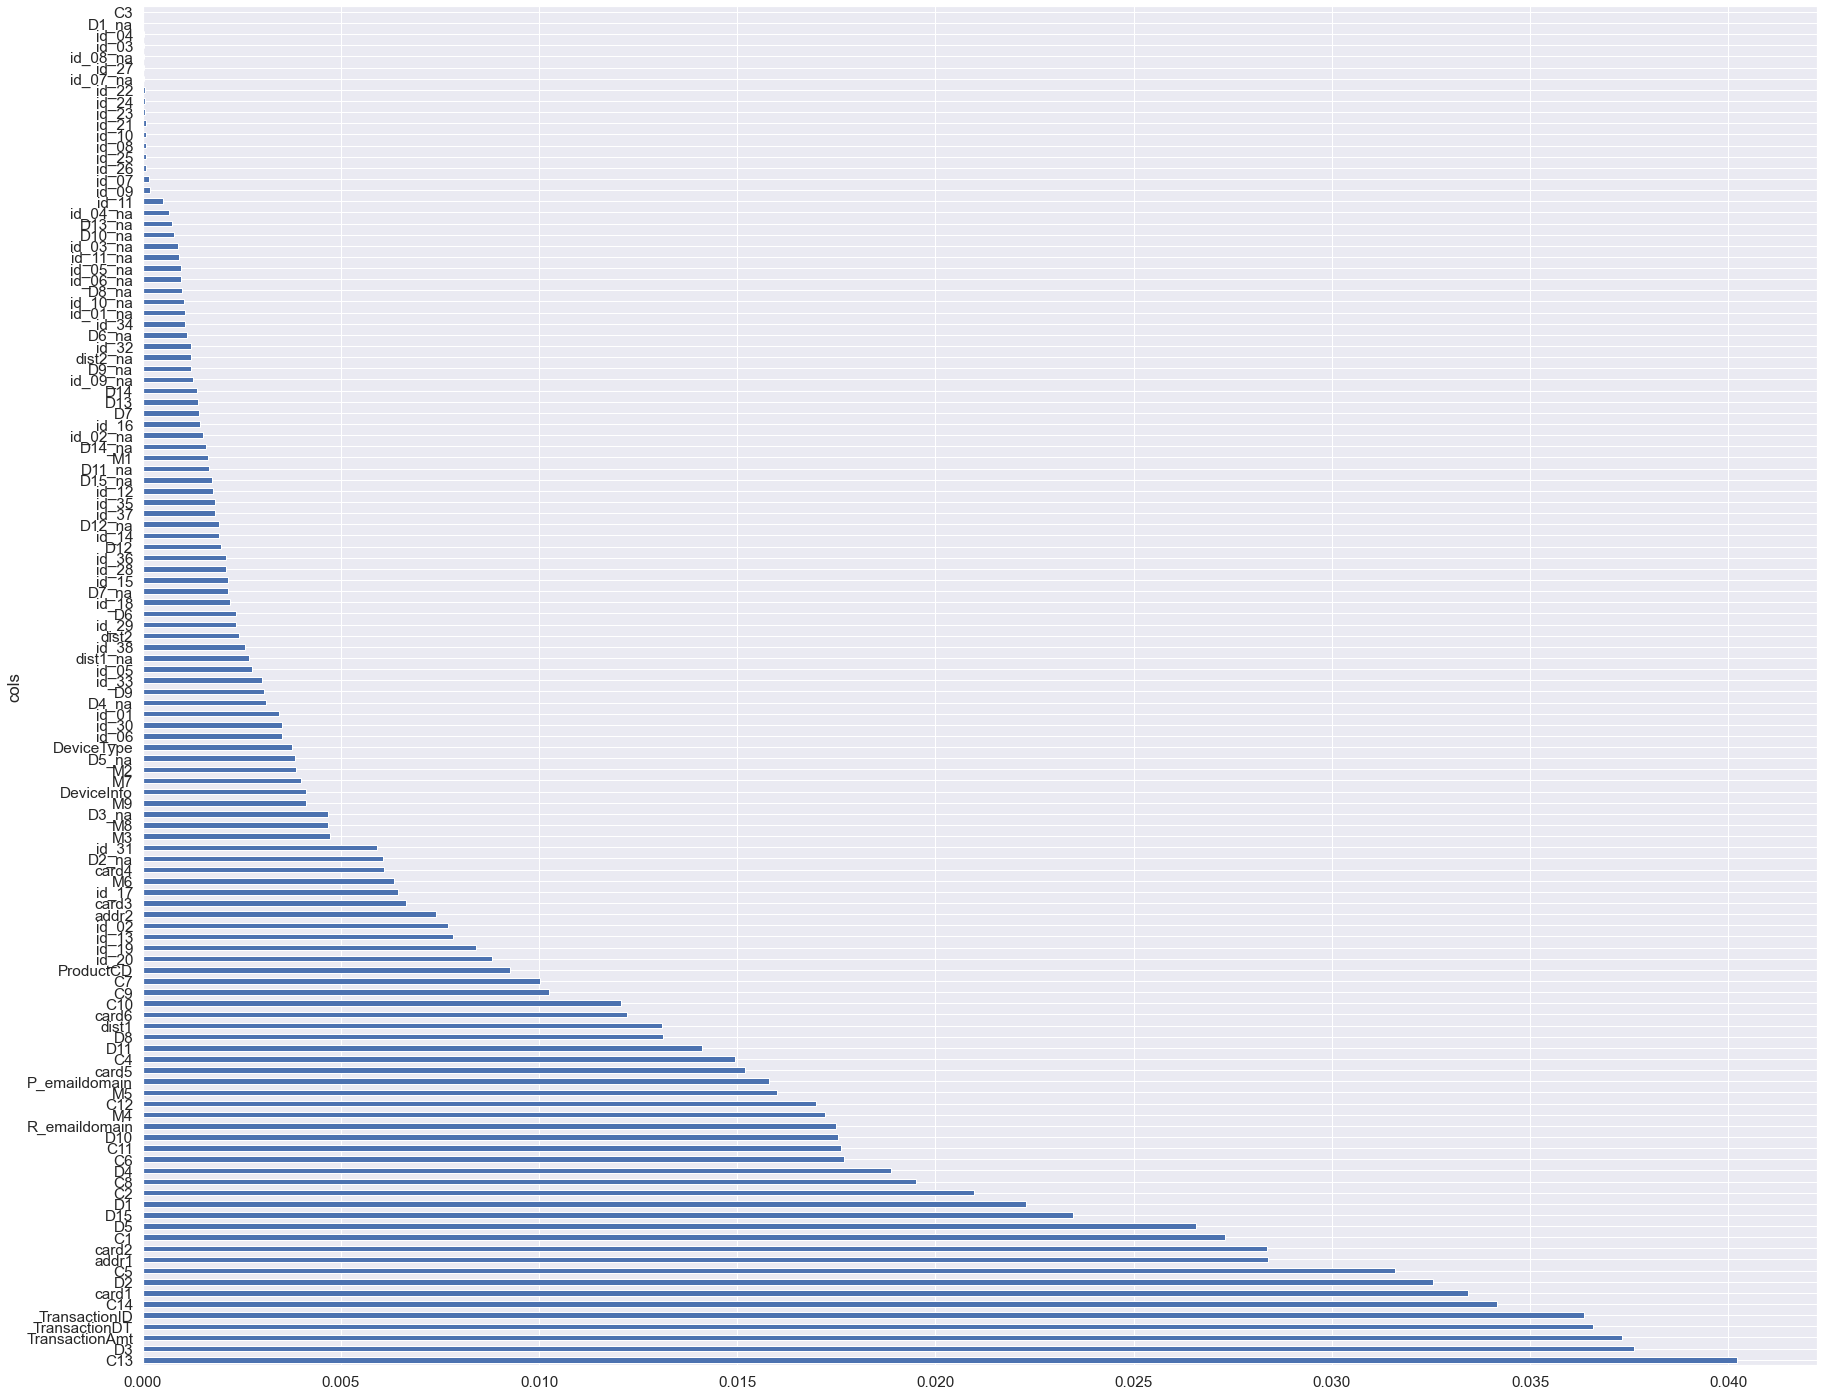

In [96]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(30,25), legend=False)
                   
plot_fi(fi)

## Removing low-importance features

In [90]:
# Trains our random forest using only the features with feature importance greater than min_feat_imp.
# Prints the training score and the validation score.
# Returns the model as well as training and validation dataframes with only the features deemed important.
def top_features(min_feat_imp, n_estimators=200):
    to_keep = fi[fi.imp>min_feat_imp].cols
    xs_imp       = xs[to_keep]
    valid_xs_imp = valid_xs[to_keep]
    print(f'n_features: {len(to_keep)}')
    m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5).fit(xs_imp, y)
   
    preds_train = m.predict_proba(xs_imp)
    preds_isFraud_train = preds_train[:,1]
    preds_valid = m.predict_proba(valid_xs_imp)
    preds_isFraud_valid = preds_valid[:,1]
    print(f'Train: {roc_auc_score(y,       preds_isFraud_train)}') 
    print(f'Valid: {roc_auc_score(valid_y, preds_isFraud_valid)}')
    
    return m, xs_imp, valid_xs_imp

In [238]:
top_features(0.00001);

n_features: 122
Train: 0.9939155409104443
Valid: 0.8744809234239891


In [239]:
top_features(0.0001);

n_features: 108
Train: 0.9939797521246351
Valid: 0.8747451706633151


In [240]:
top_features(0.0005);

n_features: 105
Train: 0.9940289307439097
Valid: 0.8763230105840846


In [244]:
top_features(0.001);

n_features: 96
Train: 0.9939652280043084
Valid: 0.8762572217569383


In [245]:
top_features(0.002);

n_features: 76
Train: 0.9941866621691436
Valid: 0.8737354077105597


In [246]:
top_features(0.003);

n_features: 62
Train: 0.9941631810733553
Valid: 0.8777127654347141


In [253]:
top_features(0.004);

n_features: 53
Train: 0.9942708733838558
Valid: 0.8722312731148089


In [248]:
top_features(0.005);

n_features: 47
Train: 0.9939382658132533
Valid: 0.8718807633469425


In [249]:
top_features(0.006);

n_features: 47
Train: 0.993921486151799
Valid: 0.8724736817393147


In [250]:
top_features(0.007);

n_features: 40
Train: 0.9939147847174651
Valid: 0.8692967092483258


In [251]:
top_features(0.008);

n_features: 37
Train: 0.9935268316434639
Valid: 0.8689909686408409


In [252]:
top_features(0.009);

n_features: 34
Train: 0.9929447586165517
Valid: 0.8680625545282913


In [242]:
top_features(0.01);

n_features: 34
Train: 0.9930136764801479
Valid: 0.8692175442696021


In [243]:
top_features(0.02);

n_features: 16
Train: 0.9919291784075407
Valid: 0.848640655420508


The validation score drops off somewhere between min_feat_imp = 0.005 and min_feat_imp = 0.01.

In [254]:
min_feat_imp_values = [0.00001, 0.0001, 0.002, 0.003, 0.004, 0.005,
                       0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.025, 
                       0.03, 0.035, 0.04]

In [255]:
%%time
forests = [] 
preds_isFraud_train = []
preds_isFraud_valid = []
# Trains a series of random forests with increasing min_feat_imp values
for min_feat_imp in min_feat_imp_values:
    to_keep = fi[fi.imp>min_feat_imp].cols
    xs_imp       = xs[to_keep]
    valid_xs_imp = valid_xs[to_keep]
    
    f = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5).fit(xs_imp, y)
    
    preds_train = f.predict_proba(xs_imp)
    preds_isFraud_train.append(preds_train[:,1])
    preds_valid = f.predict_proba(valid_xs_imp)
    preds_isFraud_valid.append(preds_valid[:,1])
    
    forests.append(f)

CPU times: user 53min 43s, sys: 39.6 s, total: 54min 22s
Wall time: 9min 19s


In [256]:
# For a set of random forests with increasing min_feat_imp values (x-axis).
# Compute and plot the roc_auc_score on both the training and the validation data (y-axis)
def rf_min_feat_imp_vs_score(preds_train, preds_valid, y, valid_y):
    plt.plot(min_feat_imp_values, [roc_auc_score(y,       preds) for preds in preds_train])
    plt.plot(min_feat_imp_values, [roc_auc_score(valid_y, preds) for preds in preds_valid ])
    plt.xlabel('min_feat_imp')
    plt.ylabel('roc_auc_score')
    plt.legend(['train', 'valid'])

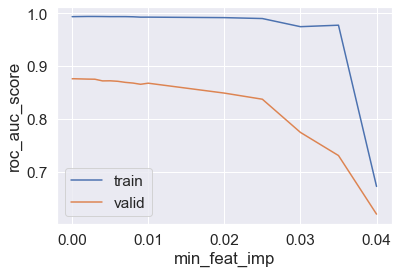

In [257]:
rf_min_feat_imp_vs_score(preds_isFraud_train, preds_isFraud_valid, y, valid_y)

In [97]:
m, xs_imp, valid_xs_imp = top_features(0.003);

n_features: 62
Train: 0.9941588785960593
Valid: 0.8763980808225296


With min_feat_imp = 0.003, we keep 62 of the 122 total features (speeding up training) without sacrificing the roc_auc_score.

In [261]:
fi = rf_feature_importance(m, xs_imp)
fi              

,cols,imp
0,C13,0.045212
3,TransactionAmt,0.039928
1,TransactionDT,0.038999
4,TransactionID,0.037865
2,D3,0.037613
5,card1,0.036479
6,D2,0.035545
7,C14,0.035416
10,addr1,0.030839
8,C5,0.030709


<AxesSubplot:ylabel='cols'>

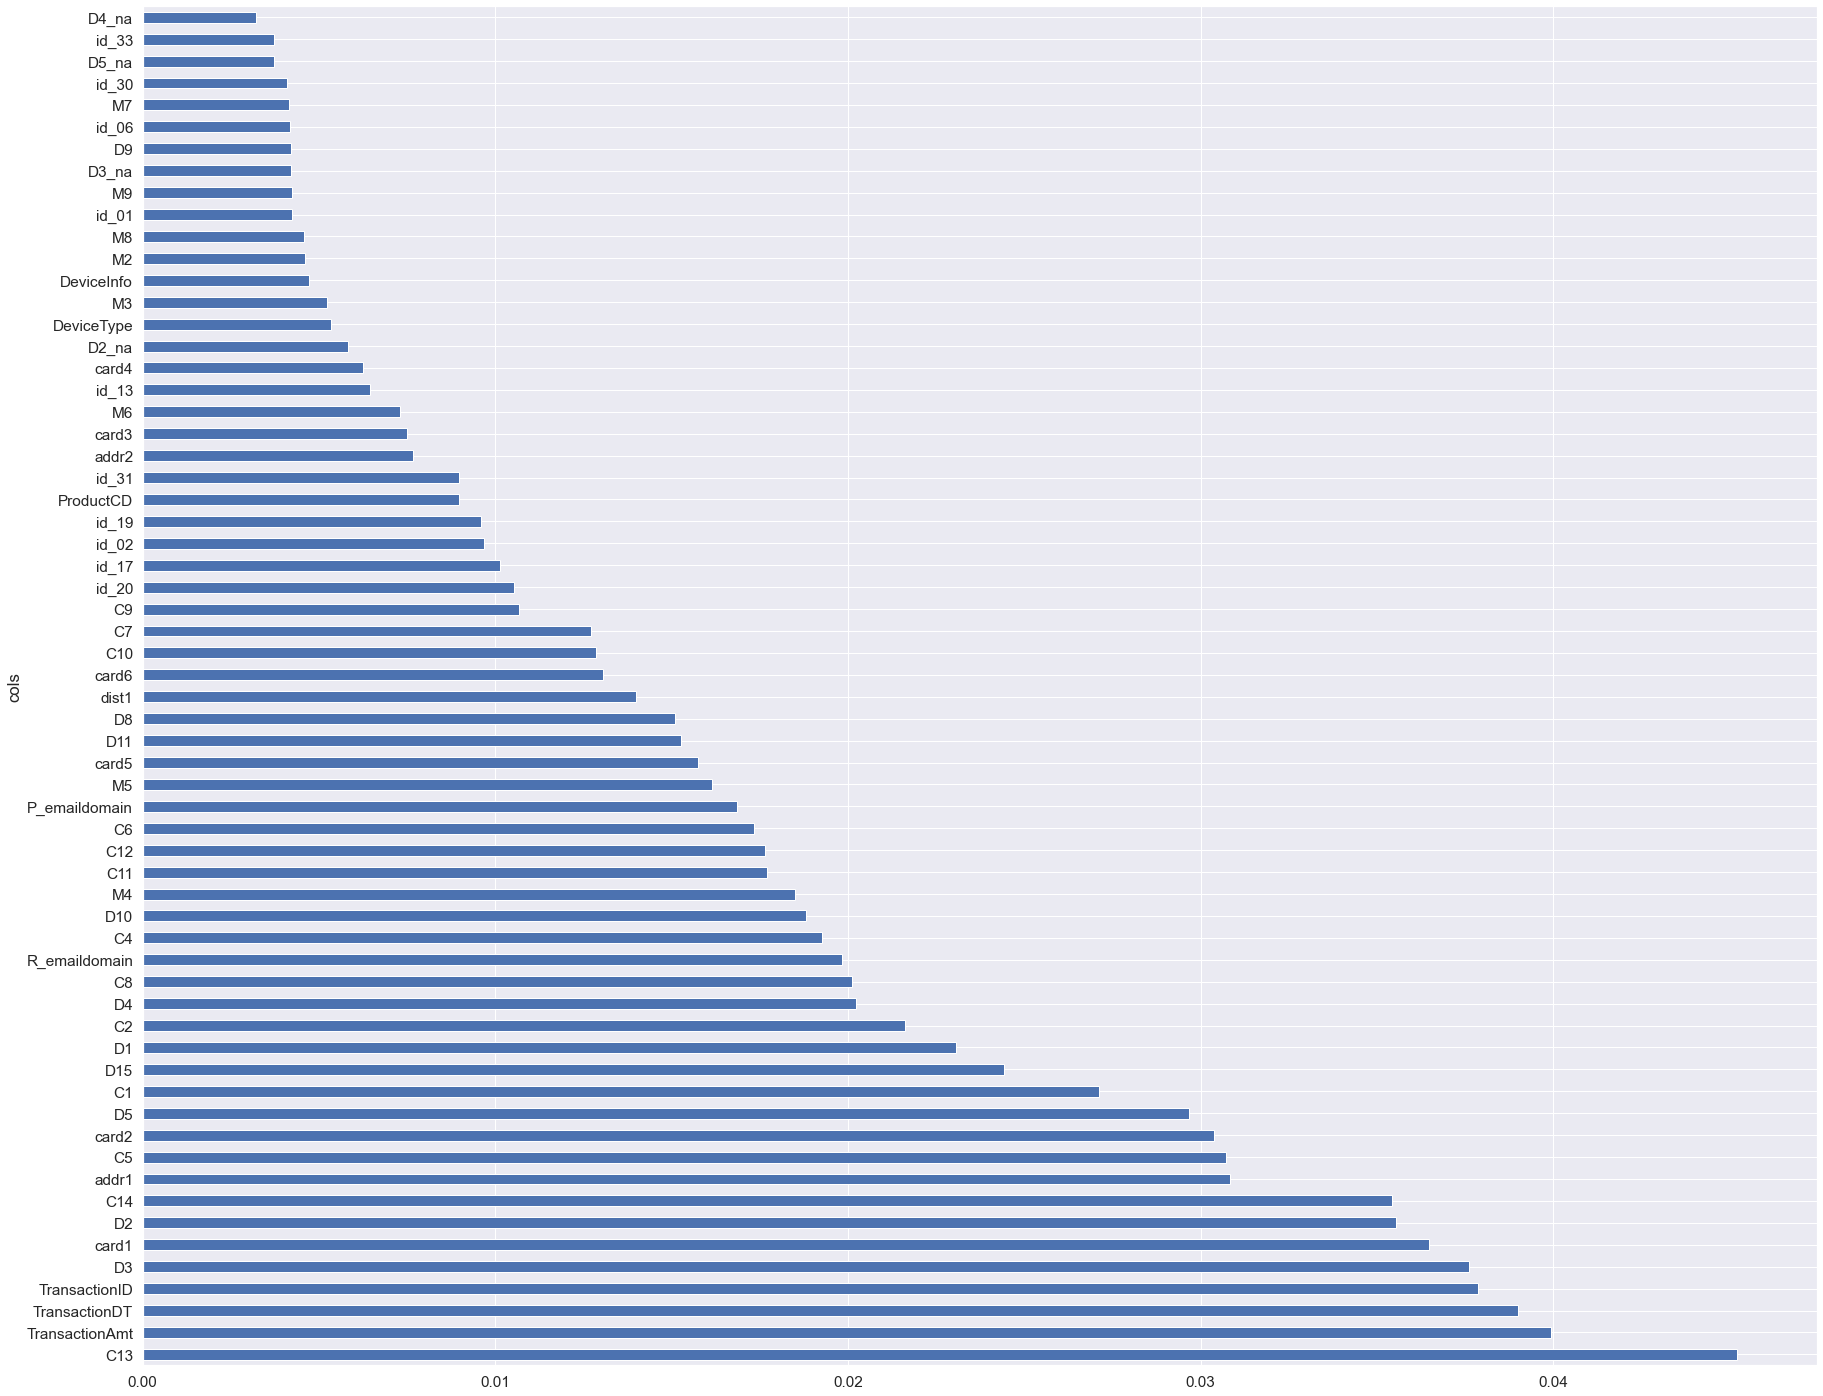

In [263]:
plot_fi(fi)

##  Removing redundant features

The fourth question (Which columns are redundant, so both are not needed?) can be answered by clustering feature using the rank correlation.

In [98]:
xs_imp.shape, valid_xs_imp.shape

((48491, 62), (10563, 62))

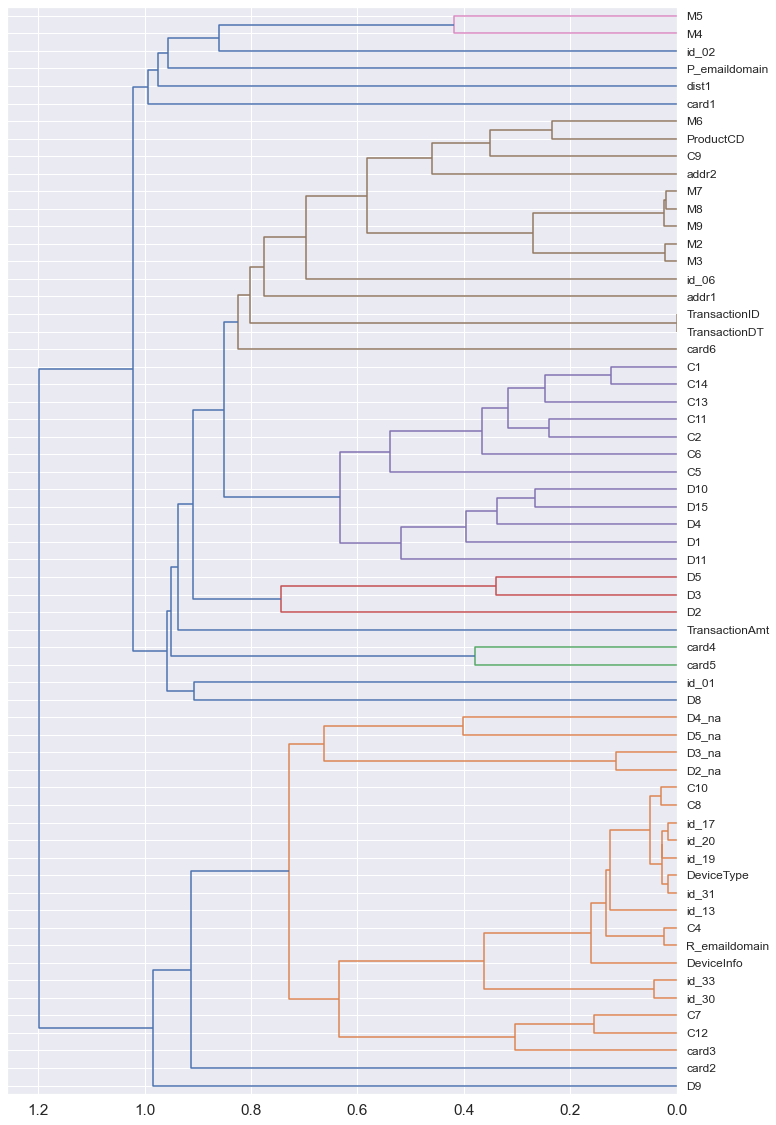

In [265]:
cluster_columns(xs_imp, figsize=(12,20))

This suggests that one of TransactionID or TransactionDT is redundant.

In [266]:
def get_oob(df):
    m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5).fit(df, y)
    return roc_auc_score(y,  m.oob_decision_function_[:,1:2])

In [268]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'TransactionID', 'TransactionDT',)}

{'TransactionID': 0.8990673376549502, 'TransactionDT': 0.899589997381747}

In [99]:
to_drop = ['TransactionID']

In [100]:
xs_imp = xs_imp.drop(to_drop, axis=1)
valid_xs_imp = valid_xs_imp.drop(to_drop, axis=1)

In [101]:
xs_imp.shape, valid_xs_imp.shape

((48491, 61), (10563, 61))

In [102]:
(path/'xs_imp.pkl').save(xs_imp)
(path/'valid_xs_imp.pkl').save(valid_xs_imp)

In [141]:
xs_imp = (path/'xs_imp.pkl').load()
valid_xs_imp = (path/'valid_xs_imp.pkl').load()

In [143]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs_imp, y, valid_xs_imp , valid_y);

Train_AROC: 0.9940060624251906
Valid_AROC: 0.8773849132297238


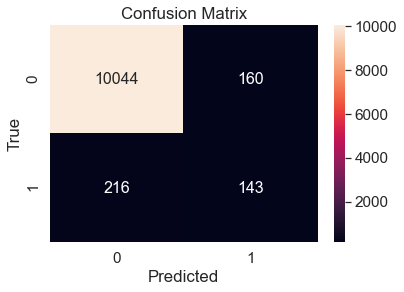

In [144]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/Important_Features_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [145]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8773849132297238
APRC: 0.420875859851189
Percision: 0.47194719471947194
Recall: 0.3983286908077994
ACC: 0.964404051879201
F1: 0.43202416918429
F2: 0.4111558366877516
F5: 0.4007329165768484
F10: 0.3989448388255116


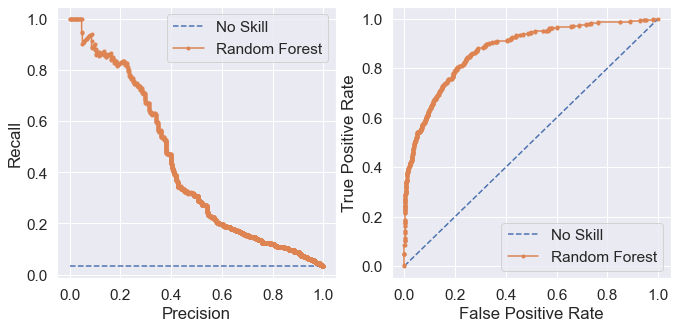

In [146]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/Important_Features_RF_aucs.jpg', dpi=1000, bbox_inches='tight')

Droping low importance features and then redundant features has led to modest increase in the roc_auc_score. Precision increased by nearly 100 percent while recall decreased by approximately 23 percent. The model has been considerably simplified also. 

## Partial dependance

The fifth question (How do predictions vary as we vary these colummns?) is handled with partial dependance. We will look at the top 3 more important features.

In [287]:
valid_xs_imp.columns

Index(['C13', 'TransactionAmt', 'TransactionDT', 'D3', 'card1', 'D2', 'C14',
       'addr1', 'C5', 'card2', 'D5', 'C1', 'D15', 'D1', 'C2', 'D4', 'C8',
       'R_emaildomain', 'C4', 'D10', 'M4', 'C11', 'C12', 'C6', 'P_emaildomain',
       'M5', 'card5', 'D11', 'D8', 'dist1', 'card6', 'C10', 'C7', 'C9',
       'id_20', 'id_17', 'id_02', 'id_19', 'ProductCD', 'id_31', 'addr2',
       'card3', 'M6', 'id_13', 'card4', 'D2_na', 'DeviceType', 'M3',
       'DeviceInfo', 'M2', 'M8', 'id_01', 'M9', 'D3_na', 'D9', 'id_06', 'M7',
       'id_30', 'D5_na', 'id_33', 'D4_na'],
      dtype='object')

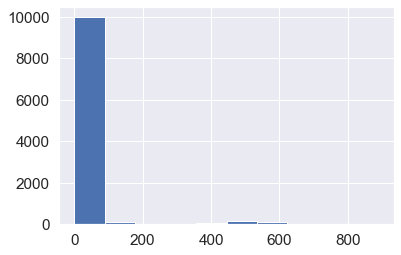

In [288]:
ax = valid_xs_imp['C13'].hist()

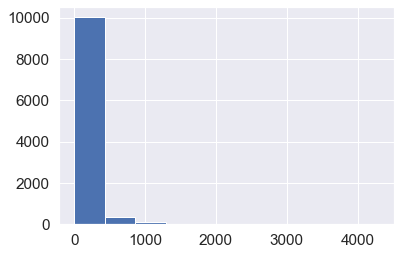

In [291]:
ax = valid_xs_imp['TransactionAmt'].hist()

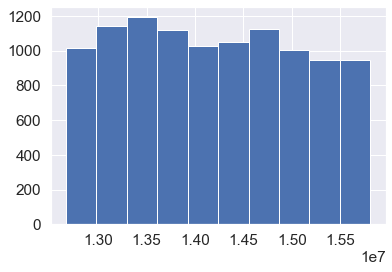

In [292]:
ax = valid_xs_imp['TransactionDT'].hist()

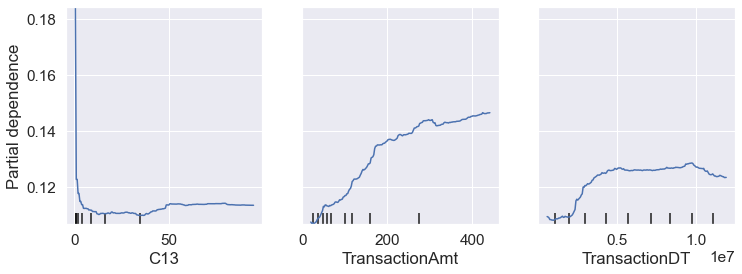

In [293]:
from sklearn.inspection import plot_partial_dependence

_, ax = plt.subplots(figsize=(12,4))
plot_partial_dependence(m, xs_imp, ['C13','TransactionAmt','TransactionDT'],
                        grid_resolution=200, ax=ax)

## Tree interpretor

In [294]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs_imp, y, valid_xs_imp, valid_y);

Train_AROC: 0.9939545761135484
Valid_AROC: 0.8794582167242295


Tree interperator will help us answer the second question (What are the most important factors when predicting a particular row and how did the influence it?).

In [295]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [296]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [297]:
row = valid_xs_imp[:5]

In [298]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [299]:
assert torch.allclose(tensor(prediction[0,1]), tensor(bias[0,1] + contributions[0].sum(axis=0)[1]))

In [300]:
prediction[0,1]

0.027664235036677188

In [301]:
prediction[0,1], bias[0,1], contributions[0].sum(axis=0)[1]

(0.027664235036677188, 0.4994543725208594, -0.47179013748418247)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/matplotlib/pyplot.py'>

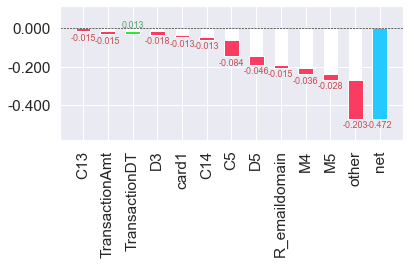

In [305]:
waterfall(valid_xs_imp.columns, contributions[0][:,1], threshold=0.15, 
          rotation_value=90, formatting='{:,.3f}')

In [315]:
valid_y[160:161]

573602    1
Name: isFraud, dtype: int8

In [316]:
row = valid_xs_imp[160:161]
prediction,bias,contributions = treeinterpreter.predict(m, row.values)
prediction[0,1], bias[0,1], contributions[0].sum(axis=0)[1]

(0.5438157856334987, 0.4994543725208594, 0.044361413112638665)

In [317]:
m.predict(row)

array([1], dtype=int8)

<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/fastaiV2/lib/python3.8/site-packages/matplotlib/pyplot.py'>

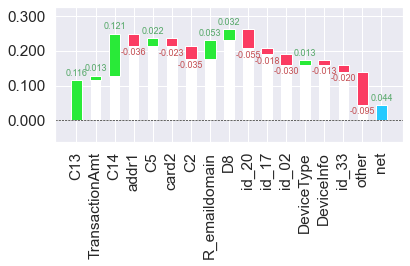

In [319]:
waterfall(valid_xs_imp.columns, contributions[0][:,1], threshold=0.1, 
          rotation_value=90, formatting='{:,.3f}')

## Finding out-of-domain data

Let's put the training and validation data back together and add a column that indicates whether a row belongs in the validation set. By training a model with this new column as the dependant variable we can see which if any of the features are distributed differently between the training and validation data.

In [370]:
df_dom = pd.concat([xs_imp, valid_xs_imp])
is_valid = np.array([0]*len(xs_imp) + [1]*len(valid_xs_imp))

m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5).fit(df_dom, is_valid)
rf_feature_importance(m, df_dom)[:6]

,cols,imp
2,TransactionDT,0.817918
39,id_31,0.016434
4,card1,0.013408
12,D15,0.011823
43,id_13,0.011194
50,M8,0.009688


TransactionDT is by far the most important feature. This is because of the way the validation set was chosen (transactions with the largest TransactionID values). 

In [377]:
m = rf(xs_imp, y, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
pred_valid = m.predict(valid_xs_imp)
prob_valid = m.predict_proba(valid_xs_imp)[:,1]
prob_train = m.predict_proba(xs_imp)[:,1]
print('orig', roc_auc_score(valid_y, prob_valid))

for c in ('TransactionID','TransactionDTWeek'):
    m = rf(xs_imp.drop(c,axis=1), y, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
    pred_valid = m.predict(valid_xs_imp.drop(c,axis=1))
    prob_valid = m.predict_proba(valid_xs_imp.drop(c,axis=1))[:,1]
    prob_train = m.predict_proba(xs_imp.drop(c,axis=1))[:,1]
    print(c, roc_auc_score(valid_y, prob_valid))

orig:
Train_AROC: 0.9939660493863376
Valid_AROC: 0.8789226246957607
TransactionDT:
Train_AROC: 0.993326401390519
Valid_AROC: 0.8796059003569522


In [ ]:
m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
print('orig:')
_, _, prob_valid, pred_valid = fit(m, xs=xs_imp, valid_xs=valid_xs_imp);



for c in ['TransactionDT']:
    m = rf(n_estimators=1000, criterion='entropy',
       max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
    print(c+':')
    _, _, prob_valid, pred_valid = fit(m, xs=xs_imp.drop(c,axis=1), valid_xs=valid_xs_imp.drop(c,axis=1));
    
    

We can try dropping columns that are older to see if keeping just more recent data increases the score on the validation set.

<AxesSubplot:>

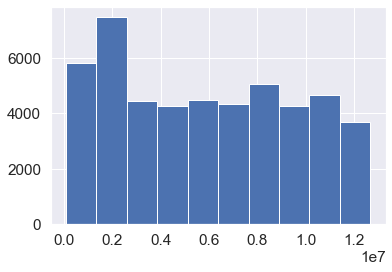

In [324]:
xs_imp['TransactionDT'].hist()

In [218]:
filt = xs_imp['TransactionID']>=0
xs_filt = xs_imp[filt]
y_filt = y[filt]

In [ ]:
xs_filt, y_filt

In [222]:
m = rf(xs_filt, y_filt, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
pred_valid = m.predict(valid_xs_imp)
prob_valid = m.predict_proba(valid_xs_imp)[:,1]
prob_train = m.predict_proba(xs_imp)[:,1]
roc_auc_score(y, prob_train ), roc_auc_score(valid_y, prob_valid)

(0.966909353421794, 0.8500548005260851)

In [223]:
filt = xs_imp['TransactionID']>3.1e6
xs_filt = xs_imp[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
pred_valid = m.predict(valid_xs_imp)
prob_valid = m.predict_proba(valid_xs_imp)[:,1]
prob_train = m.predict_proba(xs_imp)[:,1]
roc_auc_score(y, prob_train ), roc_auc_score(valid_y, prob_valid)

(0.95495098421699, 0.8499716211561347)

In [229]:
filt = xs_imp['TransactionID']>3.2e6
xs_filt = xs_imp[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
pred_valid = m.predict(valid_xs_imp)
prob_valid = m.predict_proba(valid_xs_imp)[:,1]
prob_train = m.predict_proba(xs_imp)[:,1]
roc_auc_score(y, prob_train ), roc_auc_score(valid_y, prob_valid)

(0.9355956937187279, 0.852025662303501)

In [228]:
filt = xs_imp['TransactionID']>3.3e6
xs_filt = xs_imp[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
pred_valid = m.predict(valid_xs_imp)
prob_valid = m.predict_proba(valid_xs_imp)[:,1]
prob_train = m.predict_proba(xs_imp)[:,1]
roc_auc_score(y, prob_train ), roc_auc_score(valid_y, prob_valid)

(0.9088463472734295, 0.8574258627168535)

In [230]:
filt = xs_imp['TransactionID']>3.4e6
xs_filt = xs_imp[filt]
y_filt = y[filt]

m = rf(xs_filt, y_filt, n_estimators=200,
       class_weight='balanced', criterion='entropy',
       max_features='sqrt', max_leaf_nodes=200,
       min_samples_split=2, min_samples_leaf=1)
pred_valid = m.predict(valid_xs_imp)
prob_valid = m.predict_proba(valid_xs_imp)[:,1]
prob_train = m.predict_proba(xs_imp)[:,1]
roc_auc_score(y, prob_train ), roc_auc_score(valid_y, prob_valid)

(0.869799707695324, 0.8461736511241936)

# Imbalanced learn

Let's take a look at under sampling and over sampling as methods to address the class imbalance. Although a class imbalance of 1 to 30 isn't too large, I would still like to explore the possibility.

## RandomUnderSampler

In [147]:
xs_imp = (path/'xs_imp.pkl').load()
valid_xs_imp = (path/'valid_xs_imp.pkl').load()

In [148]:
xs_imp.shape, valid_xs_imp.shape

((48491, 61), (10563, 61))

In [149]:
from imblearn.under_sampling import RandomUnderSampler

In [150]:
rus = RandomUnderSampler(random_state=42)

In [151]:
xs_imp_rus, y_rus = rus.fit_resample(xs_imp, y)

In [152]:
xs_imp_rus.shape, valid_xs_imp.shape

((3274, 61), (10563, 61))

In [153]:
 y_rus.shape, valid_y.shape

((3274,), (10563,))

In [154]:
# After unsampling we expect half of the data points to represent fraud
assert y_rus.sum()==len(y_rus)/2

In [155]:
m = RandomForestClassifier(n_jobs=-1, max_samples=2/3,
                           oob_score=True, max_features='sqrt',
                           n_estimators=1000, criterion='entropy',
                           max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs=xs_imp_rus, y=y_rus, valid_xs=valid_xs_imp, valid_y=valid_y);

Train_AROC: 0.9361198670482418
Valid_AROC: 0.8609592720752908


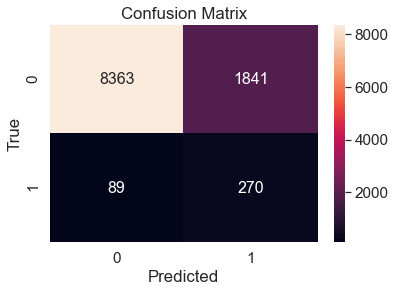

In [156]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/RUS_Imp_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [157]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8609592720752908
APRC: 0.3770884394897201
Percision: 0.12790146849834202
Recall: 0.7520891364902507
ACC: 0.817286755656537
F1: 0.2186234817813765
F2: 0.3806033267550043
F5: 0.6332311022911781
F10: 0.7174239036068506


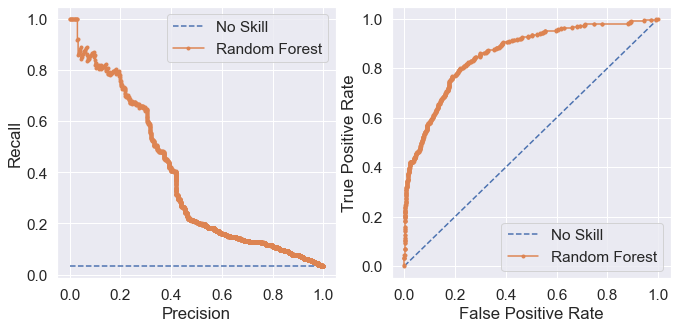

In [158]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/RUS_Imp_RF_aucs.jpg', dpi=1000, bbox_inches='tight')

Under-sampling leads to a model with lower validation roc_auc_score and lower training roc_auc_score than the model that uses the imbalanced data. There is a 70 percent decrease in percision with nearly a 100 percent increase in recall.

## RandomOverSampler

In [159]:
from imblearn.over_sampling import RandomOverSampler

In [160]:
xs_imp = (path/'xs_imp.pkl').load()
valid_xs_imp = (path/'valid_xs_imp.pkl').load()

In [161]:
ros = RandomOverSampler(random_state=42)

In [162]:
xs_imp_ros, y_ros = ros.fit_resample(xs_imp, y)

In [163]:
xs_imp_ros.shape, valid_xs_imp.shape

((93708, 61), (10563, 61))

In [164]:
 y_ros.shape, valid_y.shape

((93708,), (10563,))

In [165]:
assert y_ros.sum()==len(y_ros)/2

In [166]:
m = RandomForestClassifier(n_jobs=-1, max_samples=2/3,
                           oob_score=True, max_features='sqrt',
                           n_estimators=1000, criterion='entropy',
                           max_leaf_nodes=750, min_samples_split=30, min_samples_leaf=5)
_, _, prob_valid, pred_valid = fit(m, xs=xs_imp_ros, y=y_ros, valid_xs=valid_xs_imp, valid_y=valid_y);

Train_AROC: 0.9991871337941362
Valid_AROC: 0.8811564420091962


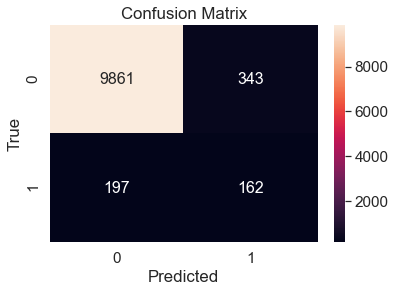

In [167]:
fig = plot_confusion_matrix(valid_y, pred_valid)
fig.savefig(path.BASE_PATH/'../figures/ROS_Imp_RF_cm.jpg', dpi=1000, bbox_inches='tight')

In [168]:
metrics(valid_y, pred_valid, prob_valid, acc=True);

AROC: 0.8811564420091962
APRC: 0.4258633187870898
Percision: 0.3207920792079208
Recall: 0.45125348189415043
ACC: 0.9488781596137461
F1: 0.375
F2: 0.4173106646058733
F5: 0.4443037974683544
F10: 0.44944375772558715


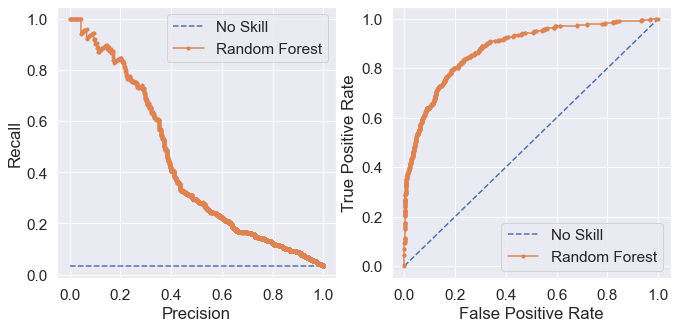

In [169]:
fig = plot_roc_prc(valid_y, prob_valid, label='Random Forest')
fig.savefig(path.BASE_PATH/'../figures/ROS_Imp_RF_auc.jpg', dpi=1000, bbox_inches='tight')

Over-sampling leads to a model with higher validation roc_auc_score and higher training roc_auc_score than the model that uses the imbalanced data. There is a 30 percent decrease in percision and a 15 percent increase in recall.